169001437/169001437 [==============================] - 3s 0us/step


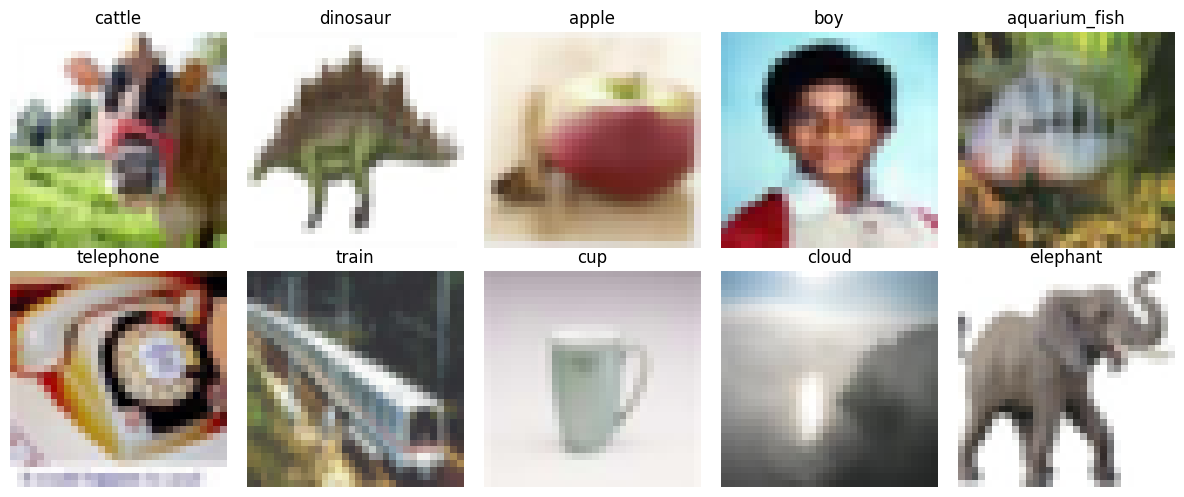

[2, 9, 11, 28, 35, 39, 46, 98]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100

# Load the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Define the class labels for CIFAR-100 (You can customize this if needed)
class_labels = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle",
    "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel",
    "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee", "clock",
    "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster",
    "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion",
    "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse",
    "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear",
    "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum",
    "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark",
    "shrew", "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar",
    "sunflower", "sweet_pepper", "table", "tank", "telephone", "television",
    "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale",
    "willow_tree", "wolf", "woman", "worm"
]
obj = [i for i,j in enumerate(class_labels) if j in("baby","bottle","boy","cup","girl","keyboard","man","woman")]

# Plot some random images from the dataset
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_labels[train_labels[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()
print(obj)

In [ ]:
import pandas as pd
more = pd.read_csv("moredata.csv").values
label = [11 for i in range(68)]
label = np.array(label)
plt.figure(figsize=(12, 5))
for i in range(20,30,1):
    plt.subplot(2, 5, i-20 + 1)
    plt.imshow(more[i].reshape((32,32,3)))
    plt.title(class_labels[11])
    plt.axis('off')

more = np.vstack((more,more))

more.shape, label.shape

FileNotFoundError: ignored

In [ ]:
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()
def fil_test(train_labels):
  rs = []
  for i in train_labels:
    if i in obj:
      rs.append(i)
  train_labels = np.array(rs)
  train_labels = np.hstack((train_labels, train_labels))
  return train_labels


In [ ]:
import numpy as np
def fil_train(train_images,train_labels):
  rs = []
  for i,j in zip(train_images,train_labels):
      if j in obj:
        rs.append(i)
  rs = np.array(rs)
  rs = np.vstack((rs,rs))
  return rs

In [ ]:
train_images = fil_train(train_images, train_labels)
test_images = fil_train(test_images, test_labels)
train_images.shape,  test_images.shape

In [ ]:
train_labels = fil_test(train_labels)

test_labels = fil_test(test_labels)


In [ ]:
train_labels.shape, test_labels.shape

In [ ]:
x_train = train_images.reshape((8000, 3072))
x_train = np.vstack((x_train,more))
x_test = test_images.reshape((1600, 3072))
y_train = train_labels
y_train = np.hstack((y_train,label))
y_test = test_labels
x_train.shape, y_train.shape

In [ ]:
from sklearn import svm

model = svm.SVC(kernel="rbf", gamma="scale",C=10)

model.fit(x_train,y_train)

In [ ]:
import numpy as np
y_pred = model.predict(x_test)
print("accuracy: ", np.sum(y_pred == y_test)/len(y_test))

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(class_labels[test_labels[i]])
    plt.axis('off')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/M/project

In [ ]:
import joblib



# Save the SVM model to a file
joblib.dump(model, 'quantrong.pkl')


In [ ]:
x_train[0]

In [ ]:
i =
class_labels[model.predict(x_train[i].reshape((1,len(x_train[i]))))[0]]

In [ ]:
for i, j in enumerate(class_labels):
  if j == "man" or j == "girl":
    print(j,i)

In [ ]:
tmp1 = x_test[y_test == 35]
tmp2 = x_test[y_test == 46]
len(tmp1)

In [ ]:
model.predict(tmp1)

In [ ]:
model.predict(tmp2)

In [ ]:
plt.imshow(tmp1[15].reshape((32,32,3)))

In [ ]:
plt.imshow(tmp2[1].reshape((32,32,3)))

In [ ]:
len(y_test)